# Identitas Diri

Nama : Hasan Nur Wakhid

NIM  : A11.2021.13853

# K-Nearest Neighbors (K-NN)

# Menambahkan library
 "numpy" berguna memudahkan kita melakukan perhitungan saintifik seperti matriks, aljabar, statistik, dan sebagainya.    
 "matpotlib.pyplot" berguna untuk memvisualisaikan data melalui grafik atau diagram      
 "pandas" berguna untuk memproses data, mulai pembersihan data, manipulasi data, hingga melakukan analisis data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Impor dataset
Memuat dataset serta memberikan nilai pada variabel x dan y (label) serta menampilkannya

In [2]:
dataset = pd.read_csv('exams.csv')
X = dataset.iloc[:, [6, 7]].values
y = dataset.iloc[:, 4].values

menampilkan 5 data teratas pada dataset

In [3]:
dataset.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group D,some college,standard,1,59.0,70,78
1,male,group D,associate's degree,standard,0,96.0,93,87
2,female,group D,some college,free/reduced,0,57.0,76,77
3,male,group B,some college,free/reduced,0,70.0,70,63
4,NaN,group D,associate's degree,standard,0,83.0,85,86


In [4]:
print(X)

[[70 78]
 [93 87]
 [76 77]
 ...
 [86 86]
 [72 62]
 [47 45]]


In [5]:
print(y)

[1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0
 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1
 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1
 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1
 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0
 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 1 0 1 0 

## Membagi dataset ke dalam Training set dan Test set
membagi data set ke 75 persen untuk training set dan 25 persen untuk testing set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
print(X_train)

[[73 72]
 [65 69]
 [97 91]
 ...
 [58 60]
 [65 65]
 [86 88]]


Mengecek panjang dari X, y, X_train, X_test, y_train, dan y_test

In [8]:
len(X)

1000

In [9]:
len(X_train)

750

In [10]:
len(X_test)

250

In [11]:
len(y)

1000

In [12]:
len(y_train)

750

In [13]:
len(y_test)

250

## Feature Scaling
mengubah nilai numerik dalam dataset ke skala umum, tanpa mendistorsi perbedaan dalam rentang nilai

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

menampilkan X_train

In [15]:
print(X_train)

[[ 0.15680811  0.16889231]
 [-0.41374899 -0.03079644]
 [ 1.86847942  1.43358776]
 ...
 [-0.91298646 -0.62986271]
 [-0.41374899 -0.29704812]
 [ 1.0839634   1.233899  ]]


menampilkan X_test

In [16]:
print(X_test)

[[ 0.22812775  0.70139566]
 [ 0.29944739  0.36858107]
 [-1.05562573 -1.49518065]
 [-1.76882211 -1.29549189]
 [ 0.5134063   0.10232939]
 [-0.34242935 -0.03079644]
 [-0.34242935 -0.69642563]
 [ 0.65604557  0.90108441]
 [-0.62770791 -1.02924022]
 [ 0.72736521  0.16889231]
 [ 1.29792231  1.16733609]
 [ 1.44056159  0.76795858]
 [-0.12847044  0.03576647]
 [-1.05562573 -1.49518065]
 [ 0.44208666  0.36858107]
 [-0.48506863 -0.56329979]
 [-0.41374899 -0.29704812]
 [ 0.01416883  0.30201815]
 [-1.19826501 -1.16236605]
 [-0.69902754 -0.69642563]
 [ 0.37076702  0.63483274]
 [-1.26958465 -1.49518065]
 [ 0.44208666  0.56826982]
 [-1.84014175 -1.56174356]
 [ 0.37076702  0.10232939]
 [-0.55638827 -0.36361104]
 [ 0.01416883 -0.29704812]
 [-0.91298646 -0.62986271]
 [ 0.72736521  1.16733609]
 [ 1.58320087  1.16733609]
 [-0.0571508   0.43514398]
 [-1.26958465 -1.09580314]
 [-0.27110972 -0.56329979]
 [ 0.44208666  0.96764733]
 [ 0.94132413  1.16733609]
 [-1.62618283 -1.56174356]
 [-1.34090428 -1.22892897]
 

## Training model KNN pada Training set

In [17]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Membuat variabel prediksi dan hasil tes set

In [18]:
y_pred = classifier.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Membuat Confusion Matrix
berfungsi untuk mengetahui nilai akurasi, caranya yakni dengan membagi 117+36 dengan keseluruhan data yaitu 117+36+58+39 setelah itu mengalikannya dengan 100. Dengan begitu akan menghasilkan tingkat akurasi 61.2 persen

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[117  39]
 [ 58  36]]


## Memvisualisasikan hasil Training Set

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its 

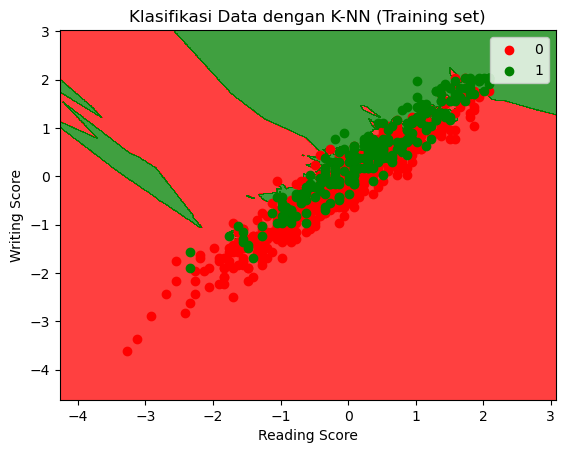

In [20]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Training set)')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.legend()
plt.show()

## Memvisualisasikan hasil Test Set

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its 

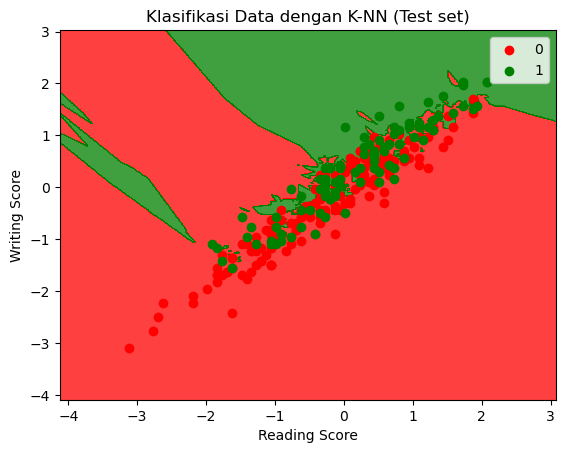

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Test set)')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.legend()
plt.show()